### Implementation of Support Vector Machines (SVM) for classifying images of
### hand- written digits into their respective numerical classes (0 to 9).

In [2]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# dataset loading
from sklearn.datasets import load_digits
data = load_digits().data
target = load_digits().target

In [24]:
data.shape, target.shape

((1797, 64), (1797,))

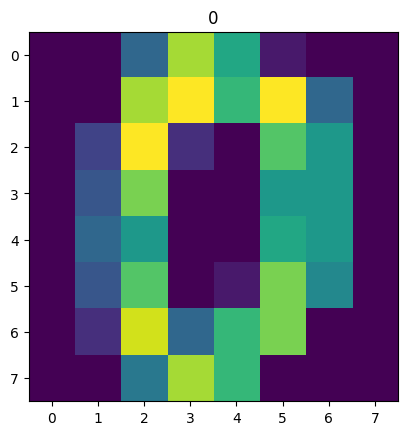

In [14]:
# Plot the digit
plt.imshow(data[0].reshape(8,8))
plt.title(target[0])
plt.show()

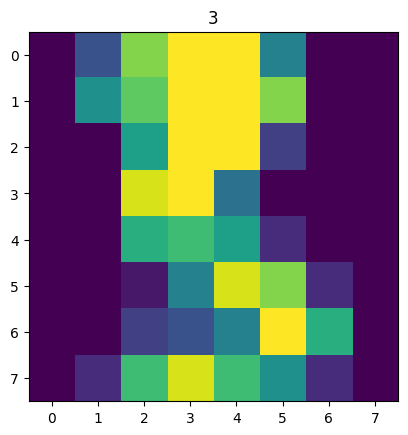

In [23]:
# Plot the digit
plt.imshow(data[1690].reshape(8,8))
plt.title(target[1690])
plt.show()

In [17]:
# Each class and their unique elements
np.unique(target,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [29]:
# Train test split
split = int(0.8 * len(data))
X_train,y_train = data[:split,:], target[:split]
X_test,y_test = data[split:,:],target[split:]

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

### Preprocesing and Model training

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [32]:
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.        ,  4.29546656,  2.29422398, ...,  0.83213003,
         1.99609197, -0.21441553],
       [ 0.        ,  0.82512242,  1.44644517, ..., -0.17103344,
        -0.52687507, -0.21441553],
       [ 0.        , -0.33165896, -1.09689127, ..., -1.1741969 ,
        -0.52687507, -0.21441553],
       ...,
       [ 0.        , -0.33165896, -0.88494657, ..., -0.17103344,
        -0.52687507, -0.21441553],
       [ 0.        , -0.33165896, -0.67300187, ...,  0.83213003,
        -0.52687507, -0.21441553],
       [ 0.        , -0.33165896,  1.02255576, ...,  0.83213003,
        -0.29751443, -0.21441553]])

In [37]:
model = svm.SVC()
model.fit(X_train,y_train)

SVC()

In [38]:
model.score(X_test,y_test)

0.9416666666666667

<Axes: >

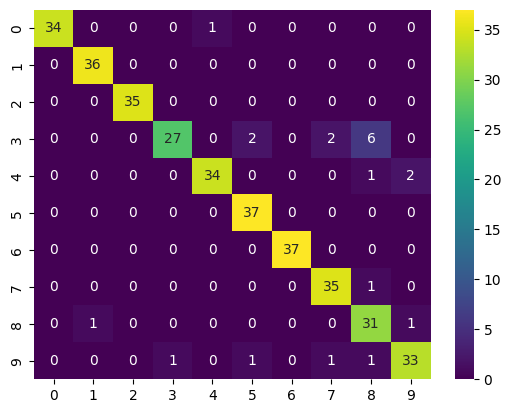

In [43]:
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)),annot=True,cmap = 'viridis')